<div style="display:block"><br><br>
    <div style="display:block" align=left display=block> 
        <font size=5><b>Day7 - HandsOn</b></font><br>
        <hr/>

</div>
<pre>
.
├── what is perceptron?
│
├── parts of a perceptron
│
├── activation functions
│ 
├── coding
│ 
├── multilayer perceptron
│ 
├── coding
│ 
├── back propagation and gradient descent
│
├── implementing gradient descent
│
└── training on a real dataset

</pre>
The sections marked with a Thinking Emoji (💭) are those which you need to read and answer. All right, without further ado, let's get started!

### What is perceptron?

A human brain has billions of neurons, which are used in decision making. These neurons use an algorithm named Perceptron for binary classification. 

### Parts of a Perceptron

The perceptron consists of 4 parts.

1. Input values or One input layer: similar to other classifiers you've seen, Perceptron also needs you to provide its inputs, or X.
2. Weights and Bias: similar to the weights of a Linear regression you've seen before (y = w0 + w1 * x1 + w2 * x2 + ... + wm * xm), a Perceptron also has weights it needs to learn using the training input, X. w0, is called bias.
3. Net sum: it has a components to sum the multiplication of xi and wi.
4. Activation Function: its difference from other classifiers you've seen is in this component. The output of the Perceptron, or y, is equal to y = f(w0 + w1 * x1 + w2 * x2 + ... + wm * xm), in which f is called activation function.

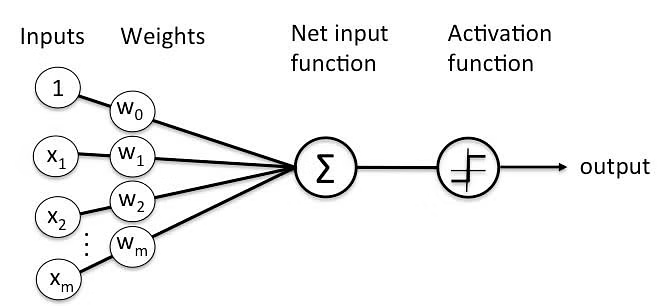

### Activation Functions

When you calculate the sum, or sum = w0 + w1 * x1 + w2 * x2 + ... + wm * xm, then you need to pass this sum from an activation function. This is to make the relation between input, or X, and output, or y, non-linear. For example if your activation function is "step function", y is 1 if sum > n and y is 0 otherwise. Some important activation functions you can use:

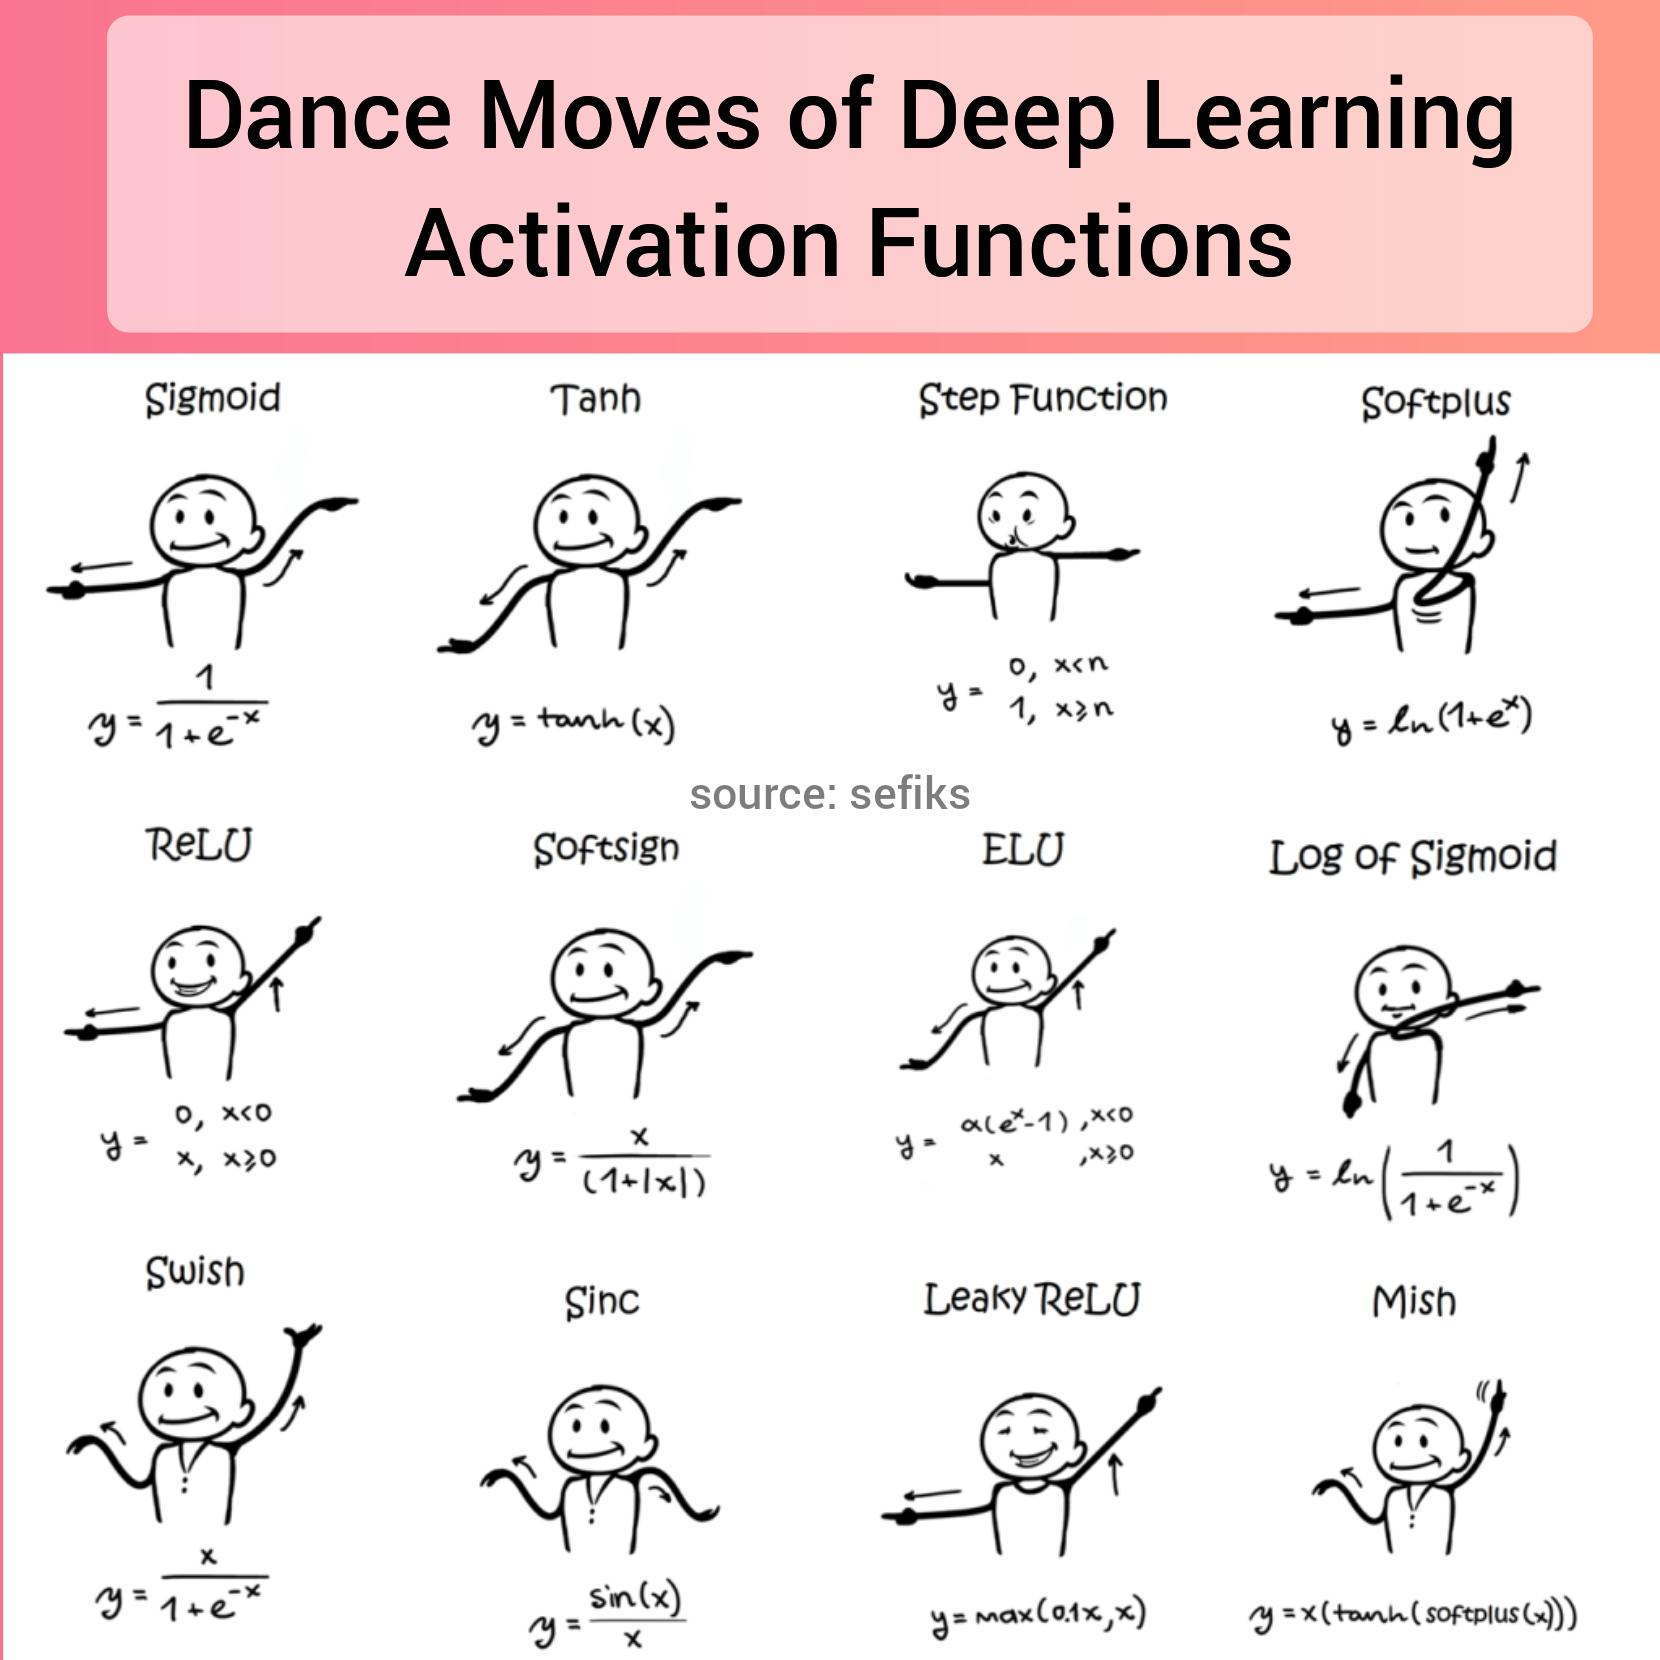

### Coding

💭 Now lets code a simple perceptron. Assume you have the following points as X. 
* Code a Percetron with bias of -1.5, weights equal to 1, and step function as activation function to predict the AND boolean operator (0 AND 0 = 0, 0 AND 1 = 0, 1 AND 1 = 1, or y = [0,0,0,1]).
* Plot the decision boundry. 

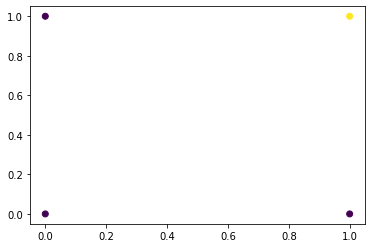

In [145]:
import matplotlib.pyplot as plt
import numpy as np
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = [0,0,0,1]
plt.scatter(X[:,0], X[:,1], c = y)

In [146]:
def perceptron(W, X, n):
    predictions = np.dot(X, W) + -1.5
    predictions = np.where(predictions >= n, 1, 0)  
    print(predictions)
    
    
perceptron([1,1] , X ,0)

[0 0 0 1]


### Multilayer Perceptron

Consider the XOR boolean operator, instead of AND operator. As you can see, we can't seperate the y = 0 and y = 1 with only one line. 

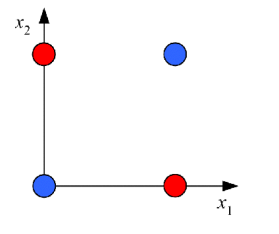

MLP can be used for this. In MLP we have multiple connected Perceptrons in different layers. Look at the following figure, it is an MLP, with one hidden layer, p inputs, and one output. Each hidden layer has multiple nodes and nodes are all Perceptrons. For example h1 is a Perceptron, with x1 to xp as its inputs, w11 to w1p as its weights, b1 as its bias, and y1 = f(b1 + w1 * x1 + ... + wp * xp) as its output. The output of this MLP is y = g(b0 + y1 * w01 + ... + yq * w0q).

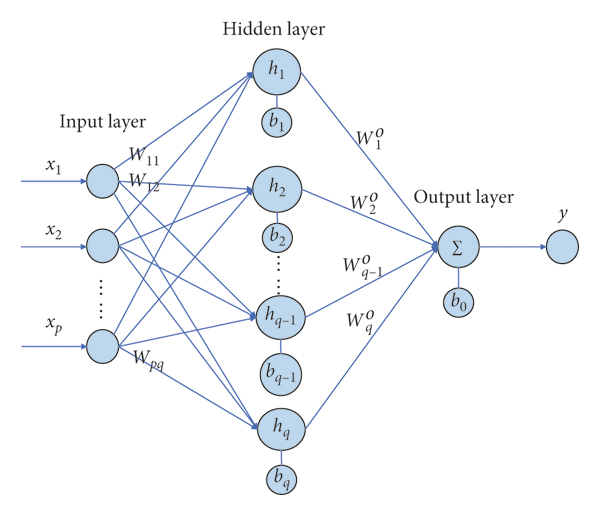

So what is the intuiotion behind it? Each hidden node draws a line. This can help us seperate more complecated datasets.

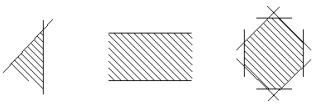

For the XOR problem, this will use x1 XOR x2 = (x1 AND \~x2) OR (\~x1 AND x2). so in the first layer it has two nodes, one for y1 = (x1 AND \~x2), the pink line, and the other for y2 = (\~x1 AND x2), the purple line. Then in the last layer it's output will  be y = y1 OR y2, or check if the points are between two lines ot not.

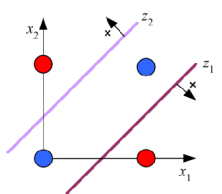

### Coding

💭 Now code an MLP to solve the XOR problem.

In [147]:
def MLP(X):
    return 

### Training on a real dataset

💭 Now we want to use neural networks for learning a dataset. We want to learn how to train an image classifier train on the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist). Please use google colab, so that you won't have to install tensorflow. 
* First, run the following code to download the data. 
* Get unique values from the labels.
* Check the shape of the X.
* Covert 2D images to 1D vectors, so that we can use them as inputs.
* Convert the array to float32.
* Convert the pixel values from integers between 0 and 255 to floats between 0 and 1.
* Use the tf.keras.utils.to_categorical to convert the labels from an integer format to a one hot encoding.
* Using the Keras Sequential API create our neural network with following architecture:
  * The hidden layer will have 512 units using the ReLU activation function.
  * The output layer will have 10 units and use softmax function.
  * We will use the categorical crossentropy loss function, and the RMSProp optimizer (another optimizer to update weights similar to Stochastic Gradient Descent).
* Use model.summary() to check your architecture.
* Use model.fit to train your model for 5 epochs.
* Test your model and print the accuracy.
* Compare your result with SVM and Logistic Regression.

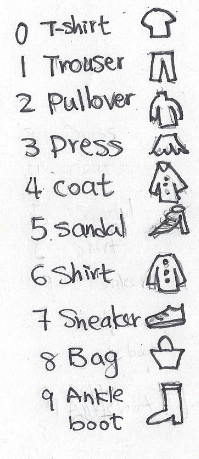

In [148]:
import tensorflow as tf
import numpy as np
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [149]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [150]:
train_images.shape

(60000, 28, 28)

In [151]:
train_images = train_images.reshape(60000 , -1)
test_images = test_images.reshape(10000 , -1)
train_labels = train_labels.astype('float32')
test_labels = test_labels.astype('float32')
train_images = train_images/255
test_images = test_images/255



In [152]:
train_labels_cat  =  tf.keras.utils.to_categorical(train_labels)
test_labels_cat = tf.keras.utils.to_categorical(test_labels)

In [153]:
test_labels_cat.shape

(10000, 10)

In [154]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import relu,sigmoid,linear , softmax
from tensorflow.keras.losses import CategoricalCrossentropy

model = Sequential([
    Dense(512 , activation='relu' , input_shape = (784,)) , 
    Dense(10 , activation='softmax'),
])
model.compile(optimizer='RMSProp' , loss='CategoricalCrossentropy' , metrics = ['accuracy'])

In [155]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 512)               401920    
                                                                 
 dense_43 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [157]:
history = model.fit(train_images , train_labels_cat , epochs=5 , validation_data=(test_images,test_labels_cat))

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4974 - accuracy: 0.8241 - val_loss: 0.4822 - val_accuracy: 0.8450
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3803 - accuracy: 0.8654 - val_loss: 0.4461 - val_accuracy: 0.8548
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3564 - accuracy: 0.8790 - val_loss: 0.4221 - val_accuracy: 0.8637
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3422 - accuracy: 0.8842 - val_loss: 0.4021 - val_accuracy: 0.8702
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3333 - accuracy: 0.8875 - val_loss: 0.4070 - val_accuracy: 0.8752


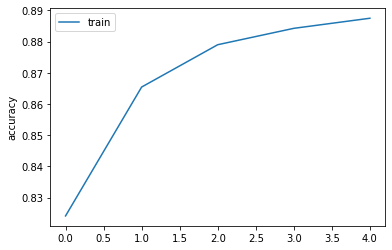

In [158]:
plt.plot(history.history['accuracy'],label='train')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [164]:
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=100).fit(train_images,train_labels)
y_pred_lr = lr.predict(test_images)
print(f"LR acc  = {accuracy_score(y_pred_lr , test_labels)}")

sv = SVC(max_iter=100).fit(train_images,train_labels)
y_pred_sv = lr.predict(test_images)
print(f"svc acc  = {accuracy_score(y_pred_sv , test_labels)}")


c:\Users\shadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR acc  = 0.8439
svc acc  = 0.8439


c:\Users\shadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


### Back propagation and Gradient Descent

Backpropagation is used for updating weights we use in our MLP, so that we reach our goal of predicting the output. Assume the following MLP, with two hidden layers, four input features and one output. We know that z1 = w10 + w11 * x1 + w12 * x2 + w13 * x3 + w14 * x4, and a11 = f(z1), ..., and s = g(w03 + a13 * w13 + a23 * w23). Calculating these from the input is called forward propagation. Evaluation between s and y happens through a cost function or loss function. This can be as simple as MSE (mean squared error) or more complex like cross-entropy.

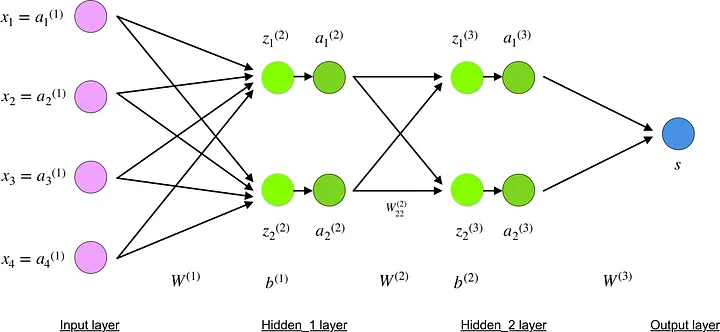

Backpropagation aims to minimize the cost function by adjusting network’s weights and biases. The level of adjustment is determined by the gradients of the cost function with respect to those parameters. Gradient of a function C(x_1, x_2, …, x_m) in point x is a vector of the partial derivatives of C in x. Why gradient? The gradient shows how much the parameter x needs to change (in positive or negative direction) to minimize C. So to update each weight and bias in our network, we need to calculate the gradian of the the cost function with respect to it. For example if our cost function is MSE, or C = (y - yp)^2, w is updated using:

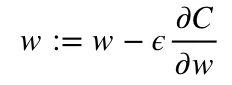

Initial values of w and b are randomly chosen.
Epsilon (e) is the learning rate. It determines the gradient’s influence. This derivation is calculated using [chain rule](https://en.wikipedia.org/wiki/Chain_rule). In chain rule, you start from the final node, calculate the derivative of the output node to the input, to reach to weight you want to update, then multiply them all to calculate the gradient of the weight you want. An example of chain rule:

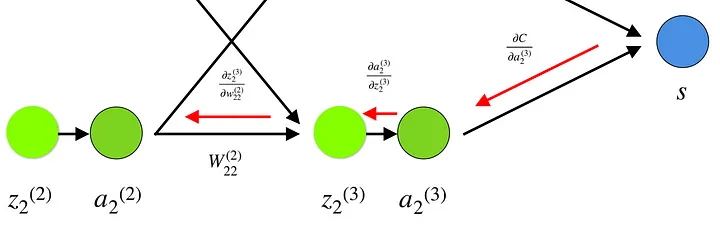

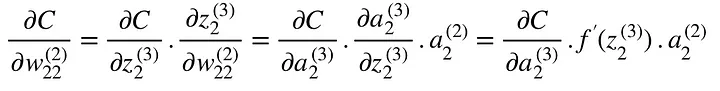

Now that we know forward and backward propagation, we can understand the gradient descent algorithm:

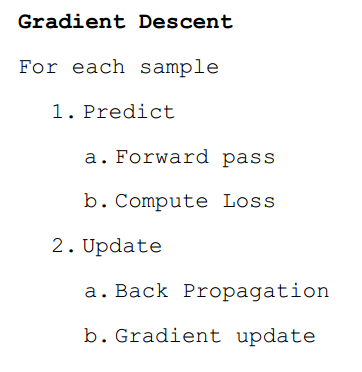

### Implementing the Gradient Descent Algorithm

Run the following code to load data and plot it.

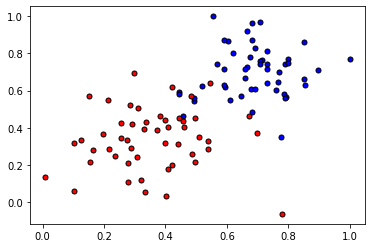

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

X = [[0.78051,0.28774,0.40714,0.2923,0.50922,0.27785,0.27527,0.43999,0.33557,0.23448,0.0084492,0.12419,0.25644,0.4591,0.44547,0.42218,0.49563,0.30848,0.39707,0.32945,0.40739,0.3106,0.49638,0.10073,0.69907,0.29767,0.15099,0.16427,0.33259,0.53741,0.19503,0.40278,0.21296,0.48447,0.25476,0.21726,0.67078,0.3815,0.53838,0.4849,0.37095,0.54527,0.32149,0.42216,0.10194,0.15254,0.45558,0.28488,0.27633,0.39748,0.5533,0.44274,0.85176,0.60436,0.68243,1,0.72989,0.67377,0.78761,0.71442,0.49379,0.78974,0.67905,0.6642,0.79396,0.70758,0.59421,0.49364,0.77707,0.79785,0.70876,0.69176,0.66408,0.65973,0.64574,0.89639,0.85476,0.62091,0.79057,0.58935,0.56846,0.65912,0.70938,0.59154,0.45829,0.79982,0.60974,0.68127,0.76694,0.69048,0.68122,0.73229,0.76145,0.58985,0.73145,0.77029,0.73156,0.44556,0.85275,0.51912],[-0.063669,0.29139,0.17878,0.4217,0.35256,0.10802,0.33223,0.31245,0.42984,0.24986,0.13658,0.33595,0.42624,0.40426,0.45117,0.20118,0.21445,0.24306,0.44438,0.39217,0.40271,0.50702,0.45384,0.32053,0.37307,0.69648,0.57341,0.27759,0.055964,0.28637,0.36879,0.035148,0.55169,0.56991,0.34596,0.28641,0.46538,0.4622,0.32774,0.26071,0.38809,0.63911,0.12007,0.61666,0.060408,0.2168,0.43769,0.52142,0.21264,0.31902,1,0.59205,0.6612,0.86605,0.48301,0.76815,0.8107,0.77975,0.58177,0.7668,0.54226,0.74233,0.60921,0.72519,0.56789,0.76022,0.61857,0.56224,0.35025,0.76921,0.96764,0.60865,0.92075,0.66666,0.56845,0.7085,0.63167,0.80424,0.56108,0.71582,0.7406,0.71548,0.74041,0.62927,0.4641,0.74847,0.54757,0.86985,0.64736,0.83058,0.96541,0.64245,0.60138,0.86955,0.74516,0.7014,0.71782,0.57991,0.85987,0.62359]]
y = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
plot_points(np.array(X).T,np.array(y))
plt.show()

💭 Now implement the following functions:
* Sigmoid activation function $\sigma(x) = \frac{1}{1+e^{-x}}$
* Output (prediction) formula $\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$
* Error function $Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$
* The function that updates the weights $w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$

In [12]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features,weights)) + bias 

# Error (log-loss) formula
def error_formula(y, output):
    return (-y*np.log(output) - (1-y) * np.log(1-output))


# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    y_hat = output_formula(x,weights,bias)
    for i in range(weights):
        weights[i] = weights[i] + learnrate*(y-y_hat) * x[i]
    
def step_function(x, n=0.5):
    output = np.where(x >= n, 1, 0)
    return output